In [51]:
import pandas as pd

df = pd.read_csv("n_movies.csv")
df_copy = df

print(df.head())
print(df.columns)
print(df.description)

                    title         year certificate duration  \
0               Cobra Kai     (2018– )       TV-14   30 min   
1               The Crown     (2016– )       TV-MA   58 min   
2        Better Call Saul  (2015–2022)       TV-MA   46 min   
3           Devil in Ohio       (2022)       TV-MA  356 min   
4  Cyberpunk: Edgerunners     (2022– )       TV-MA   24 min   

                          genre  rating  \
0         Action, Comedy, Drama     8.5   
1     Biography, Drama, History     8.7   
2                  Crime, Drama     8.9   
3        Drama, Horror, Mystery     5.9   
4  Animation, Action, Adventure     8.6   

                                         description  \
0  Decades after their 1984 All Valley Karate Tou...   
1  Follows the political rivalries and romance of...   
2  The trials and tribulations of criminal lawyer...   
3  When a psychiatrist shelters a mysterious cult...   
4  A Street Kid trying to survive in a technology...   

                         

Handle data duplicates

In [52]:
print("Rows before removing duplicates:", df.shape[0])
df = df.drop_duplicates(subset=['title','year'], keep='first')
print("Rows after removing duplicates:", df.shape[0])

Rows before removing duplicates: 9957
Rows after removing duplicates: 8040


Identify missing data from dataset

In [53]:
print(df.isnull().sum())
(df.isnull().sum() / len(df)) * 100


title             0
year            524
certificate    3240
duration       1500
genre            72
rating         1080
description       0
stars             0
votes          1080
dtype: int64


title           0.000000
year            6.517413
certificate    40.298507
duration       18.656716
genre           0.895522
rating         13.432836
description     0.000000
stars           0.000000
votes          13.432836
dtype: float64

Cleaning Data based on percentage missing:
year (6%) = drop
genre (0.8%) = drop
certicate (40%)
rating
duration 
votes
                   = replace w UNKNOWN

In [54]:
df = df.dropna(subset=['year'])
df = df.dropna(subset=['genre'])
df['certificate'].fillna('Unknown', inplace=True)
df['rating'].fillna('Unknown', inplace=True)
df['duration'].fillna('Unknown', inplace=True)
df['votes'].fillna('Unknown', inplace=True)


print(df.isnull().sum())


title          0
year           0
certificate    0
duration       0
genre          0
rating         0
description    0
stars          0
votes          0
dtype: int64


Fixing 'year' column into start yr and end yr :)

In [55]:
import numpy as np

# Remove parentheses
df['year_clean'] = df['year'].str.replace(r'[\(\)]', '', regex=True)

# Split on dash
df[['start_year', 'end_year']] = df['year_clean'].str.split('–', expand=True)

# Convert to numeric, errors='coerce' will make invalid/missing values NaN
df['start_year'] = pd.to_numeric(df['start_year'], errors='coerce')
df['end_year'] = pd.to_numeric(df['end_year'], errors='coerce')

In [56]:
df['start_year'].value_counts()


2020.0    729
2021.0    694
2019.0    685
2018.0    678
2022.0    629
         ... 
1934.0      1
1944.0      1
1959.0      1
1938.0      1
1933.0      1
Name: start_year, Length: 86, dtype: int64

In [57]:
df['end_year'].value_counts()


2019.0    105
2020.0    101
2018.0     92
2021.0     87
2022.0     66
2017.0     63
2016.0     37
2014.0     29
2015.0     28
2013.0     22
2012.0     16
2000.0      8
2010.0      8
2011.0      8
2009.0      6
2023.0      6
2002.0      5
1999.0      5
1996.0      5
2006.0      4
2007.0      4
2008.0      4
2005.0      4
2004.0      4
2001.0      3
1989.0      2
1998.0      2
1995.0      2
1974.0      1
1979.0      1
1993.0      1
2003.0      1
1991.0      1
1969.0      1
1994.0      1
1997.0      1
Name: end_year, dtype: int64

In [58]:
print(df.head())


                    title         year certificate duration  \
0               Cobra Kai     (2018– )       TV-14   30 min   
1               The Crown     (2016– )       TV-MA   58 min   
2        Better Call Saul  (2015–2022)       TV-MA   46 min   
3           Devil in Ohio       (2022)       TV-MA  356 min   
4  Cyberpunk: Edgerunners     (2022– )       TV-MA   24 min   

                          genre rating  \
0         Action, Comedy, Drama    8.5   
1     Biography, Drama, History    8.7   
2                  Crime, Drama    8.9   
3        Drama, Horror, Mystery    5.9   
4  Animation, Action, Adventure    8.6   

                                         description  \
0  Decades after their 1984 All Valley Karate Tou...   
1  Follows the political rivalries and romance of...   
2  The trials and tribulations of criminal lawyer...   
3  When a psychiatrist shelters a mysterious cult...   
4  A Street Kid trying to survive in a technology...   

                               

Dropped all irrelevant columns

In [59]:
df = df.drop(columns=['year', 'year_clean', 'description','stars'])
print(df.head())



                    title certificate duration                         genre  \
0               Cobra Kai       TV-14   30 min         Action, Comedy, Drama   
1               The Crown       TV-MA   58 min     Biography, Drama, History   
2        Better Call Saul       TV-MA   46 min                  Crime, Drama   
3           Devil in Ohio       TV-MA  356 min        Drama, Horror, Mystery   
4  Cyberpunk: Edgerunners       TV-MA   24 min  Animation, Action, Adventure   

  rating    votes  start_year  end_year  
0    8.5  177,031      2018.0       NaN  
1    8.7  199,885      2016.0       NaN  
2    8.9  501,384      2015.0    2022.0  
3    5.9    9,773      2022.0       NaN  
4    8.6   15,413      2022.0       NaN  


Exploring the average rating by decade to identify how movie quality changed over time.

In [60]:
# Conversions to corrrect types:

df['rating'] = pd.to_numeric(df['rating'], errors='coerce')
df['start_year'] = pd.to_numeric(df['rating'], errors = 'coerce')

df['start_year'].head()



0    8.5
1    8.7
2    8.9
3    5.9
4    8.6
Name: start_year, dtype: float64

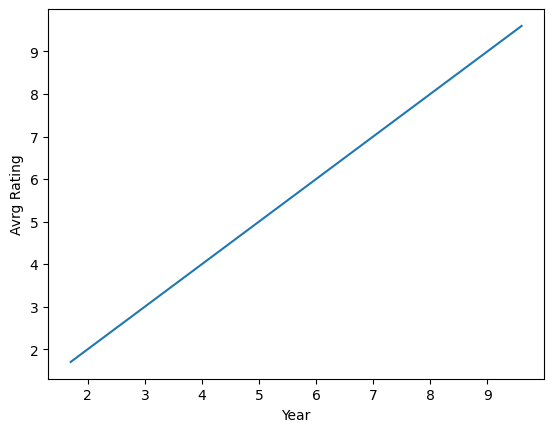

In [61]:
import matplotlib.pyplot as plt

df.groupby('start_year')['rating'].mean().plot()
plt.ylabel('Avrg Rating')
plt.xlabel('Year')
plt.show()